# Add WindSE Directory

This step will not be necessary once WindSE is a pip installable package.

In [2]:
import sys
sys.path.insert(0, '../../dev/')

# Import WindSE

This is where a normal code would actually start.

In [3]:
import WindSE

# Import Option

In [4]:
options = WindSE.LoadOptions("params.yaml")
WindSE.PrintOptions(options)

general
    name:                '20181221_105045-Imported_Test'
    preappend_datetime:  True
    folder:              'output/20181221_105045-Imported_Test/'
wind_farm
    HH:         90
    RD:         126.0
    site_x:     [-1250, 1250]
    site_y:     [-1000, 1000]
    site_z:     [0, 216]
    ex_scale:   0.95
    grid_rows:  6
    grid_cols:  6
    numturbs:   36
    A:          126.0
    alpha:      0.0
    beta:       2173.8621817909
    radius:     63.0
    ex_x:       [-1127.6499999999999, 1127.6499999999999]
    ex_y:       [-890.15, 890.15]
domain
    path:  'Mesh_Data/'


# Setup Jupyter Plots

Before we plot anything, we need to run this bit of code to make the plots appear inline.

In [5]:
%matplotlib inline

# Create the Domain

Eventually there will be support for importing custom domains.

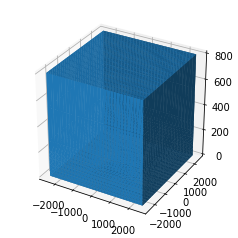

In [6]:
dom = WindSE.ImportedDomain(options)
dom.Plot()
dom.Save()

# Setup the Wind Farm

Supported types will be Random, Grid, and Imported. Eventually the z-coordinate will be determined by the topography. 

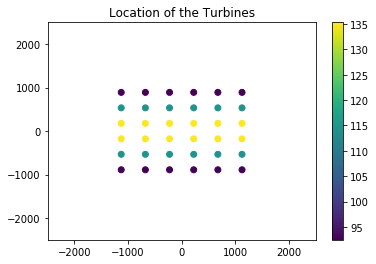

In [7]:
farm = WindSE.GridWindFarm(options,dom)
farm.Plot()

# Check the Options Again

Notice that the ranges are updated in the domain section

In [8]:
WindSE.PrintOptions(options)

general
    name:                '20181221_105045-Imported_Test'
    preappend_datetime:  True
    folder:              'output/20181221_105045-Imported_Test/'
wind_farm
    HH:         90
    RD:         126.0
    site_x:     [-1250, 1250]
    site_y:     [-1000, 1000]
    site_z:     [0, 216]
    ex_scale:   0.95
    grid_rows:  6
    grid_cols:  6
    numturbs:   36
    A:          126.0
    alpha:      0.0
    beta:       2173.8621817909
    radius:     63.0
    ex_x:       [-1127.6499999999999, 1127.6499999999999]
    ex_y:       [-890.15, 890.15]
    ex_z:       [2.454022587127304, 261.32345096997403]
domain
    path:     'Mesh_Data/'
    x_range:  [-2500.0, 2500.0]
    y_range:  [-2500.0, 2500.0]
    z_range:  [-8.865544513836668e-08, 800.0]


# Create the Function Space

Eventually this will include thinks like Linear, Taylor-Hood and more

In [11]:
fs = WindSE.LinearFunctionSpace(options,dom)
dof0 = fs.W.dim()
print("Number of DOFs: " + repr(dof0))

Number of DOFs: 42284


# Refine the Entire Domain

In [12]:
dom.Refine(1)
fs = WindSE.LinearFunctionSpace(options,dom)
dof1 = fs.W.dim()
print("Number of DOFs:  " + repr(dof1))
print("Factor Increase: " + repr(dof1/dof0))

Number of DOFs:  312564
Factor Increase: 7.392015892536184


# Refine the Wind Farm Region

In [13]:
dom.Refine(1,local=True)
fs = WindSE.LinearFunctionSpace(options,dom)
dof2 = fs.W.dim()
print("Number of DOFs:  " + repr(dof2))
print("Factor Increase: " + repr(dof2/dof1))

Number of DOFs:  760076
Factor Increase: 2.431745178587425


# Create Boundary Conditions

Other types will include, Constant, Power Law, and more

In [9]:
bc = WindSE.LinearInflow(options,dom,fs)

# Consolidate the Problem

This will take in all the domain/windfarm/bc objects and generate the problem the user wants. Each problem type can include different physics and setup.

In [10]:
problem = WindSE.StabilizedProblem(options,dom,farm,fs,bc)

# Solve

You probably shouldn't run this since it will take quite some time to solve.

In [9]:
solver = WindSE.DefaultSolver(options,problem)
solver.Solve()

# Save and Plot

This is a very small problem to make running this jupyter file quick to run. 

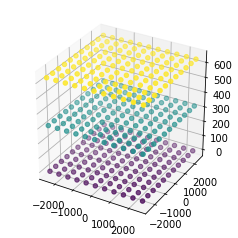

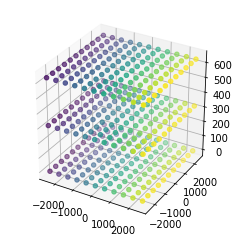

In [10]:
solver.Save()
solver.Plot()